In [1]:
from __future__ import absolute_import,division,print_function,unicode_literals

import tensorflow as tf
import tensorflow_datasets as tfds
tfds.disable_progress_bar()

import math
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.12.0


In [2]:
dataset , metadeta = tfds.load('fashion_mnist' ,as_supervised= True , with_info = True)

Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


In [3]:
dataset

{Split('train'): <_PrefetchDataset element_spec=(TensorSpec(shape=(28, 28, 1), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>,
 Split('test'): <_PrefetchDataset element_spec=(TensorSpec(shape=(28, 28, 1), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>}

In [4]:
metadeta

tfds.core.DatasetInfo(
    name='fashion_mnist',
    full_name='fashion_mnist/3.0.1',
    description="""
    Fashion-MNIST is a dataset of Zalando's article images consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.
    """,
    homepage='https://github.com/zalandoresearch/fashion-mnist',
    data_path=PosixGPath('/tmp/tmp_gupsln2tfds'),
    file_format=tfrecord,
    download_size=29.45 MiB,
    dataset_size=36.42 MiB,
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=10),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=10000, num_shards=1>,
        'train': <SplitInfo num_examples=60000, num_shards=1>,
    },
    citation="""@article{DBLP:journals/corr/abs-1708-07747,
      author    = {Han Xiao a

In [5]:
train_data , test_data = dataset['train'] , dataset['test']

In [6]:
num_train_examples=metadeta.splits['train'].num_examples
num_test_examples=metadeta.splits['test'].num_examples


In [7]:
class_names = ['T-shirt' , 'Trousers' , 'Pullover' , 'Dress' , 'Coat' ,
               'Sandal' , 'Shirt' , 'Sneaker' , 'Bag' , 'Ankle Boot']

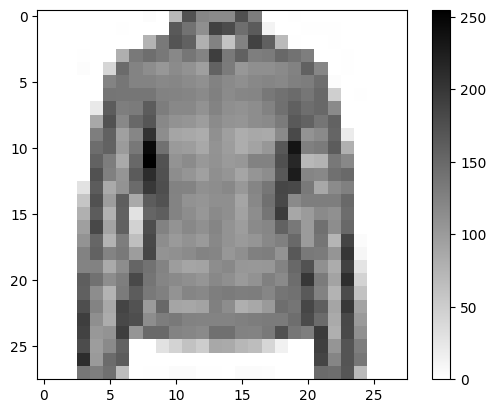

In [8]:
for image , label in test_data.take(1):
  break
image = image.numpy().reshape((28,28))

plt.figure()
plt.imshow(image , cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

MODEL BUILDING

In [9]:
l1=tf.keras.layers.Flatten(input_shape=(28,28,1))
l2=tf.keras.layers.Dense(units = 256 ,activation = tf.nn.relu)
l3=tf.keras.layers.Dense(units = 128 ,activation = tf.nn.relu)
l4=tf.keras.layers.Dense(10,activation = tf.nn.softmax)
network = tf.keras.Sequential([l1,l2,l3,l4])

In [10]:
network.compile(
    optimizer = 'adam' ,
    loss = 'sparse_categorical_crossentropy' ,
    metrics = ['accuracy']
)

In [11]:
batch_size=32
train_data=train_data.repeat().shuffle(num_train_examples).batch(batch_size)
test_data = test_data.batch(batch_size)

In [12]:
print(60000/32)

1875.0


In [13]:
print((60000/32)*5)

9375.0


In [14]:
network.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


In [15]:
network.fit(train_data,epochs=20,steps_per_epoch = math.ceil(num_train_examples/batch_size))

Epoch 1/20
1875/1875 [==============================] - 19s 7ms/step - loss: 2.2492 - accuracy: 0.7650
Epoch 2/20
1875/1875 [==============================] - 12s 7ms/step - loss: 0.5239 - accuracy: 0.8232
Epoch 3/20
1875/1875 [==============================] - 12s 7ms/step - loss: 0.4701 - accuracy: 0.8357
Epoch 4/20
1875/1875 [==============================] - 12s 6ms/step - loss: 0.4385 - accuracy: 0.8453
Epoch 5/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.4108 - accuracy: 0.8521
Epoch 6/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3877 - accuracy: 0.8618
Epoch 7/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3763 - accuracy: 0.8666
Epoch 8/20
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3724 - accuracy: 0.8678
Epoch 9/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3548 - accuracy: 0.8738
Epoch 10/20
1875/1875 [==============================] - 11s 6ms/step - l

In [16]:
test_loss , test_accuracy = network.evaluate(test_data,steps=math.ceil(num_test_examples/batch_size))
test_accuracy

313/313 [==============================] - 3s 6ms/step - loss: 0.4027 - accuracy: 0.8668


0.8668000102043152